In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
load_dotenv()

MYSQL_USERNAME = os.getenv('MYSQL_USERNAME')
MYSQL_PASSWORD = os.getenv('MYSQL_PASSWORD')
MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_PORT = os.getenv('MYSQL_PORT')
MYSQL_DB = os.getenv('STAGING_DB')

# Construct the MySQL connection string
if MYSQL_PASSWORD:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
else:
    connection_string = f"mysql+pymysql://{MYSQL_USERNAME}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
print('Connection to MySQL database established successfully.')


# Extract the data from the database
query = "SELECT * FROM distressed_companies_staging"  
df = pd.read_sql(query, con=engine)


# Close the connection
engine.dispose()

# print("Data extraction completed successfully.")


In [11]:
distressed_companies = df.copy()

In [12]:
distressed_companies.head()

,date,industry,state,company_status,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,...,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,size,age
0,2009-05-10,Healthcare,Louisiana,Private,7.649278e+07,96302.427122,21472.980004,-363564.973374,4.155639e+07,-5.922221e+07,...,5.883717e+07,-385037.953378,189861.247359,1.626742e+07,-112723.973077,295836.697590,7.745970e+07,553426.220733,217,7
1,2010-07-18,Manufacturing,Louisiana,Public,2.155687e+07,529012.749192,13195.059522,-158423.596589,1.181854e+07,-1.782566e+07,...,1.765405e+07,-171618.656111,213009.475522,5.871258e+06,-338521.287752,724107.528873,2.206261e+07,371433.072111,853,13
2,2010-02-04,Finance,Michigan,Public,1.110231e+08,658635.137644,26149.446390,-285238.541779,4.342583e+07,-9.163494e+07,...,9.132355e+07,-311387.988169,28649.071658,1.797483e+07,-454566.746178,632903.815842,1.124992e+08,313887.613437,322,27
3,2009-12-31,Healthcare,Utah,Public,7.950367e+07,475588.573576,25096.830772,53932.138490,2.050060e+07,-5.058616e+07,...,5.061499e+07,28835.307718,411763.315757,3.319955e+07,-322799.310568,733728.275894,7.998275e+07,357831.177267,615,11
4,2011-06-27,Technology,Michigan,Public,6.981595e+07,408430.322764,28117.055716,-532596.874235,2.715339e+07,-7.597221e+07,...,7.541149e+07,-560713.929952,-45694.860272,3.875797e+07,-367996.744470,326854.810940,7.041005e+07,486902.013964,232,8


In [13]:
distressed_companies.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

In [14]:
distressed_companies.shape

(1000, 24)

In [15]:
distressed_companies.isnull().sum().sort_values(ascending=False).head()

date                        0
industry                    0
size                        0
total_operating_expenses    0
total_liabilities           0
dtype: int64

In [16]:
print (distressed_companies.columns.tolist())

['date', 'industry', 'state', 'company_status', 'current_assets', 'cost_of_goods_sold', 'depreciation_and_amortization', 'ebitda', 'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales', 'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit', 'total_current_liabilities', 'retained_earnings', 'total_revenue', 'total_liabilities', 'total_operating_expenses', 'size', 'age']


In [17]:
distressed_companies.columns = [i.title().strip() for i in list(distressed_companies.columns)]

rows = distressed_companies.shape[0]
cols = distressed_companies.shape[1]
print(f"The number of rows within the dataset are {rows} and the number of columns is {cols}")



The number of rows within the dataset are 1000 and the number of columns is 24


In [18]:
#print taiwain dataset data types count for each type
print(f"Distressed dataset data types count:\n\n{distressed_companies.dtypes.value_counts()}")

Taiwan dataset data types count:

float64    18
object      4
int64       2
Name: count, dtype: int64


In [19]:
categorical_features = distressed_companies.dtypes[distressed_companies.dtypes == 'int64'].index

distressed_companies[categorical_features].columns.tolist()

['Size', 'Age']

In [20]:
print(distressed_companies.columns.tolist() )

['Date', 'Industry', 'State', 'Company_Status', 'Current_Assets', 'Cost_Of_Goods_Sold', 'Depreciation_And_Amortization', 'Ebitda', 'Inventory', 'Net_Income', 'Total_Receivables', 'Market_Value', 'Net_Sales', 'Total_Assets', 'Total_Long_Term_Debt', 'Ebit', 'Gross_Profit', 'Total_Current_Liabilities', 'Retained_Earnings', 'Total_Revenue', 'Total_Liabilities', 'Total_Operating_Expenses', 'Size', 'Age']


In [ ]:
distressed_companies

/var/folders/3v/sz89_bh17fq9z4nh6lw9gs480000gn/T/ipykernel_98304/871976257.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts[0], y=state_counts[1], palette="viridis")


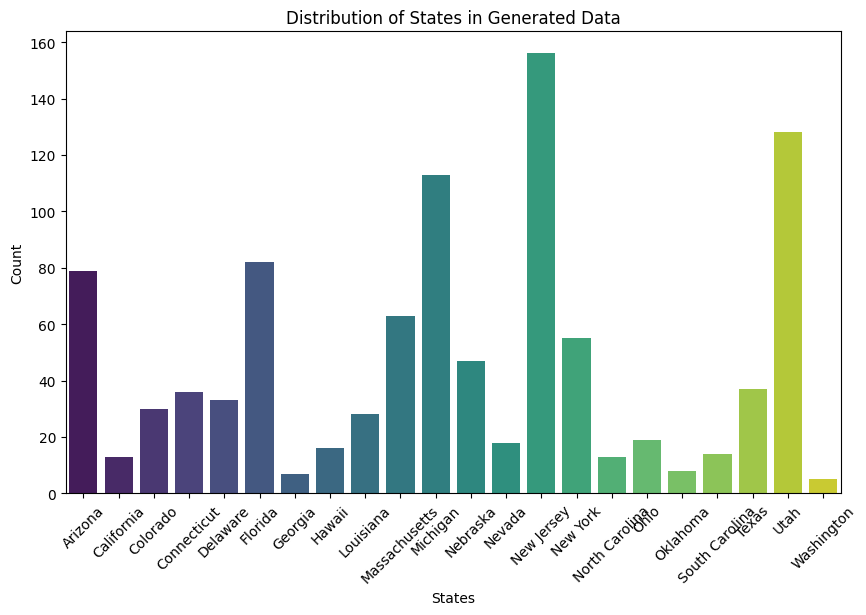

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

state = distressed_companies["State"]

state_counts = np.unique(state, return_counts=True)

# Create a bar plot for state distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts[0], y=state_counts[1], palette="viridis")
plt.title("Distribution of States in Generated Data")
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [15]:
liability_assets_flag_counts = taiwan_data_copy['Liability-Assets Flag'].value_counts()
liability_assets_flag_counts

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

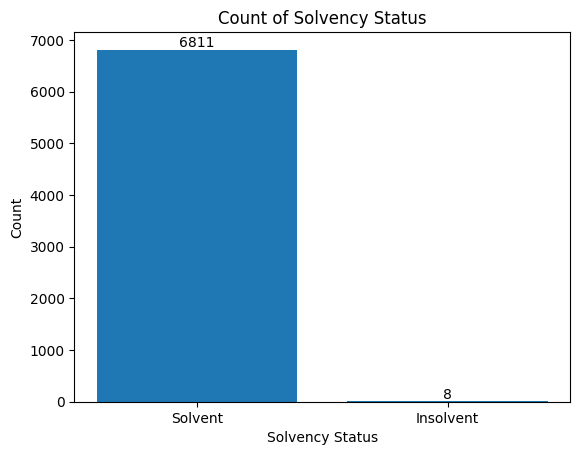

In [16]:
bars = plt.bar(liability_assets_flag_counts.index, liability_assets_flag_counts.values, tick_label=['Solvent', 'Insolvent'])

# Annotate the bars with their counts
plt.bar_label(bars, labels=liability_assets_flag_counts.values)

plt.xlabel('Solvency Status')
plt.ylabel('Count')
plt.title('Count of Solvency Status')
plt.show()


In [17]:
net_income_flag_counts =taiwan_data_copy['Net Income Flag'].value_counts()

net_income_flag_counts

Net Income Flag
1    6819
Name: count, dtype: int64

In [18]:
# Count the occurrences of 0 and 1
bankrupt_counts = taiwan_data_copy['Bankrupt'].value_counts()

bankrupt_counts

Bankrupt
0    6599
1     220
Name: count, dtype: int64